Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import XGBRegressor

Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [ ]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [ ]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [ ]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Splitting Training and Test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

1. Linear Regression

In [ ]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)


In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score) 

R squared Error :  0.8838169193709796


Visualize the actual prices and Predicted prices

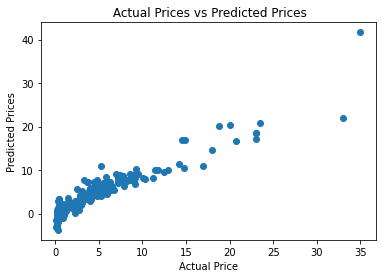

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Test data
test_data_prediction=lin_reg_model.predict(X_test)

In [ ]:
# R square Error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8401532365377697


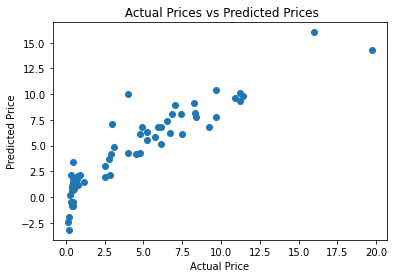

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.843587395258283


Visualize the actual prices and Predicted prices

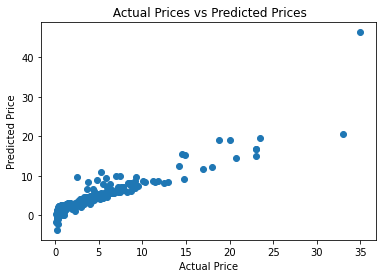

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8497457570738539


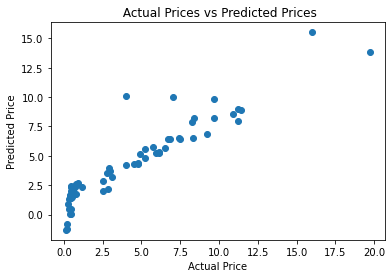

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Model Training
XboostRegression


In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

Prediction on training data

In [ ]:
# prediction on training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[ 9.074954    1.3529469   2.856411    0.49148104  1.5067161   2.5010972
  1.1384974   0.61545527  0.7352957   0.4908891   3.794722    4.8558173
  0.5434048   2.7531834   4.576069    0.4787146   1.3581727   7.3993387
  4.4814286   5.383187    3.4910367   2.9003181   5.231867    1.1460605
  0.50767654  2.8554215   1.9681582   4.502551    1.1075374   4.4887576
  6.279939    5.105443    1.1934929  32.997353    2.247506    5.6354566
  2.2591655   3.2447193   2.4985344  11.50135     0.6567315   2.9985201
  0.30043036  1.4557354  12.894212    2.9367573   0.20113938  4.50565
 14.248733    0.4065575   0.40958557  1.2438532   6.749991    0.49991336
  7.505724   22.999357    1.6975613   0.3049512   1.0529491   9.244285
  5.2563486   7.2614403  14.500753    9.250588    3.520357    1.1247295
  5.227995    0.29860246  1.1167781  10.134428    0.59470516  8.97455
  0.3186827   0.59201896  3.8059742  10.243198    7.438383    0.34904075
  3.3375292   7.5005145   0.40502164  2.01354     4.0093384   0.202

In [ ]:
# R squared error
error_score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
error_score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", error_score_1)
print('Mean Absolute Error : ', error_score_2)

R squared error :  0.999993719246304
Mean Absolute Error :  0.009071266538153096


Visualizing the actual Prices and predicted prices

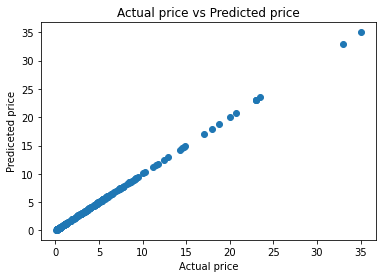

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Prediceted price')
plt.title('Actual price vs Predicted price')
plt.show()